# Glass type predict

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

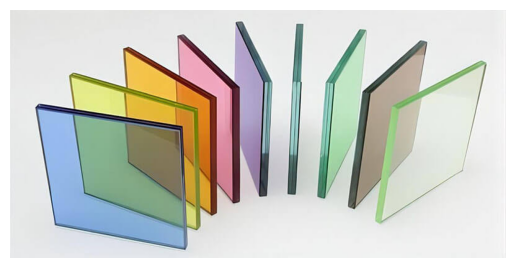

In [2]:
from PIL import Image
import matplotlib.pyplot as plt  # For displaying the image using matplotlib

# Define the image file path using a raw string (prefix with 'r')
image_path = "C:/Users/ssour/Downloads/Glass.jpg"

# Open an image file
img = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axes for image display
plt.show()

# Importing Dataset

In [3]:
df=pd.read_csv("Glass.csv")
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

In this datasets there are 11 columns and one of the columns is my target variable in this datasets we predict the type of glass and these datasets  can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

Type of glass 
1- building_windows_float_processed
2- building_windows_non_float_processed
3- vehicle_windows_float_processed
4- vehicle_windows_non_float_processed (none in this database)
5- containers
6- tableware
7- headlamps


In [4]:
# Now we can see the columns of these datasets
df.columns

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of Glass'],
      dtype='object')

In [5]:
# Here we can see that top 10 data
df.head(10)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [6]:
# Last 10 datas in these datsets
df.tail(10)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
204,205,1.51617,14.95,0.0,2.27,73.30,0.00,8.71,0.67,0.0,7
205,206,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.0,7
206,207,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,7
207,208,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7
208,209,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,7
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


# Exploratory Data Analysis

In [7]:
# Now we check the how many rows and columns 
df.shape

(214, 11)

Here we can clear see that theres is 214 rows and 11 columns contains in these datasets

In [8]:
print("The dimensions of datasets: ",df.shape)
print("The columns of the datasets: ",df.columns)

The dimensions of datasets:  (214, 11)
The columns of the datasets:  Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of Glass'],
      dtype='object')


In [9]:
# deecribe the data
df.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [10]:
# Now we checking null values 
df.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of Glass    0
dtype: int64

Here we can clear see that in these datasets hteres is no null values present.

<Axes: >

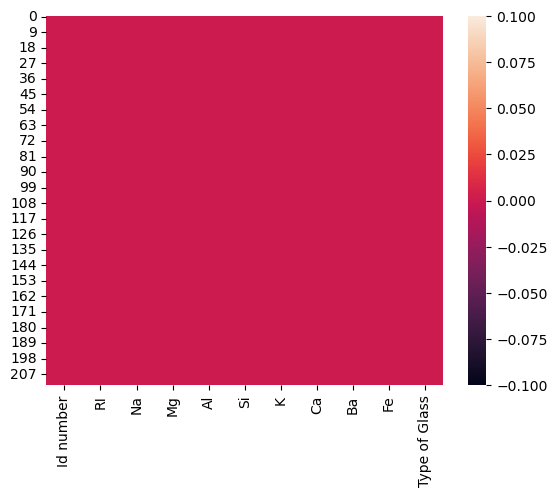

In [11]:
# Lets check the null values using heatmap
sns.heatmap(df.isnull())

In [12]:
# Count values of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id number, Length: 214, dtype: int64


1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58   

In [13]:
# Now cheking the datatypes 
df.dtypes

Id number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of Glass      int64
dtype: object

Here we can clear see that all colunmns containing numerical data

In [14]:
# Checking for numerical columns
numerical_col = []
for i  in df.dtypes.index:
    if df.dtypes[i]!= "object":
        numerical_col.append(i)
print("Numerical Columns: ",numerical_col)

Numerical Columns:  ['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of Glass']


In [15]:
#Checking number of uniques vlaues in each columns
df.nunique().to_frame("No. of unique values")

,No. of unique values
Id number,214
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32


In [16]:
df["Type of Glass"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

# Data Visualization

<Figure size 1200x600 with 0 Axes>

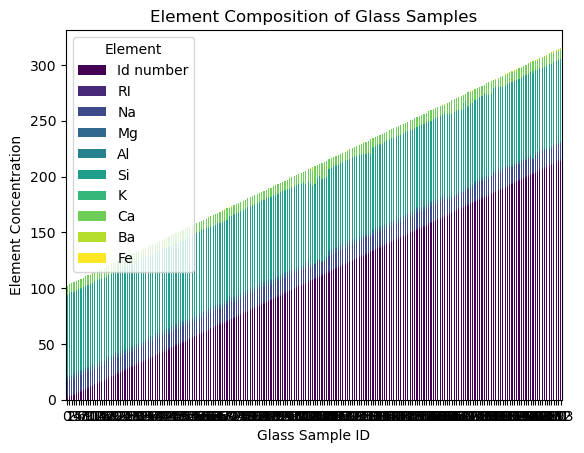

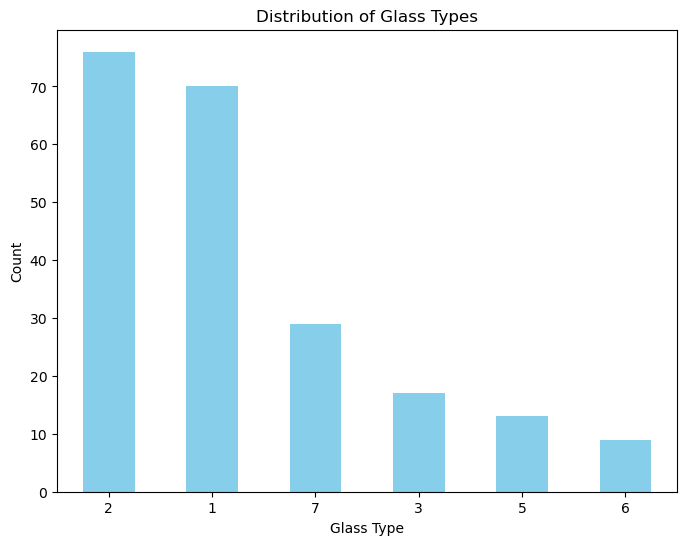

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot the element composition using a bar chart
plt.figure(figsize=(12, 6))
df.drop('Type of Glass', axis=1).plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Element Composition of Glass Samples')
plt.xlabel('Glass Sample ID')
plt.ylabel('Element Concentration')
plt.xticks(rotation=0)
plt.legend(title='Element')
plt.show()

# Plot the type of glass distribution
glass_type_counts = df['Type of Glass'].value_counts()
plt.figure(figsize=(8, 6))
glass_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In these datasets for those class type is 2 is more people buy.

# Data Distributed

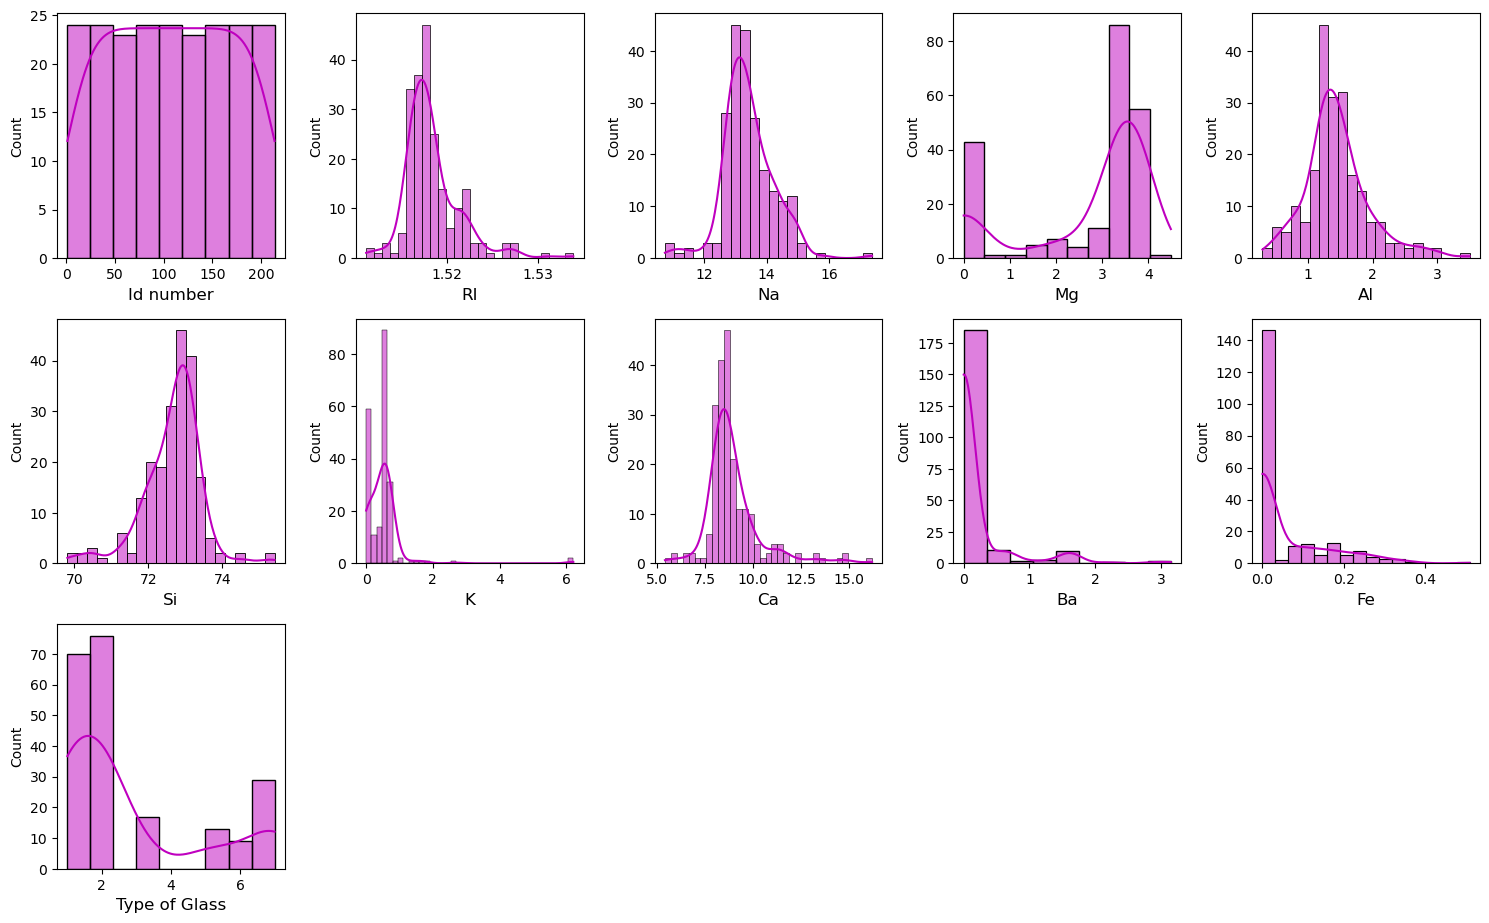

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming numerical_col is a list of column names containing numerical data
numerical_col = df.select_dtypes(include=[np.number]).columns.tolist()

plotnumber = 1  # Initialize subplot number
plt.figure(figsize=(15, 15))  # Set overall figure size to accommodate subplots

# Iterate over numerical columns and plot distributions
for col in numerical_col:
    if plotnumber <= 25:  # Limit the number of subplots to 25 (5x5 grid)
        plt.subplot(5, 5, plotnumber)
        sns.histplot(df[col], kde=True, color="m")  # Use sns.histplot instead of sns.distplot
        plt.xlabel(col, fontsize=12)
        plotnumber += 1  # Increment plotnumber for the next subplot
    else:
        break  # Exit loop if plotnumber exceeds the maximum number of subplots

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()  # Display the figure with subplots

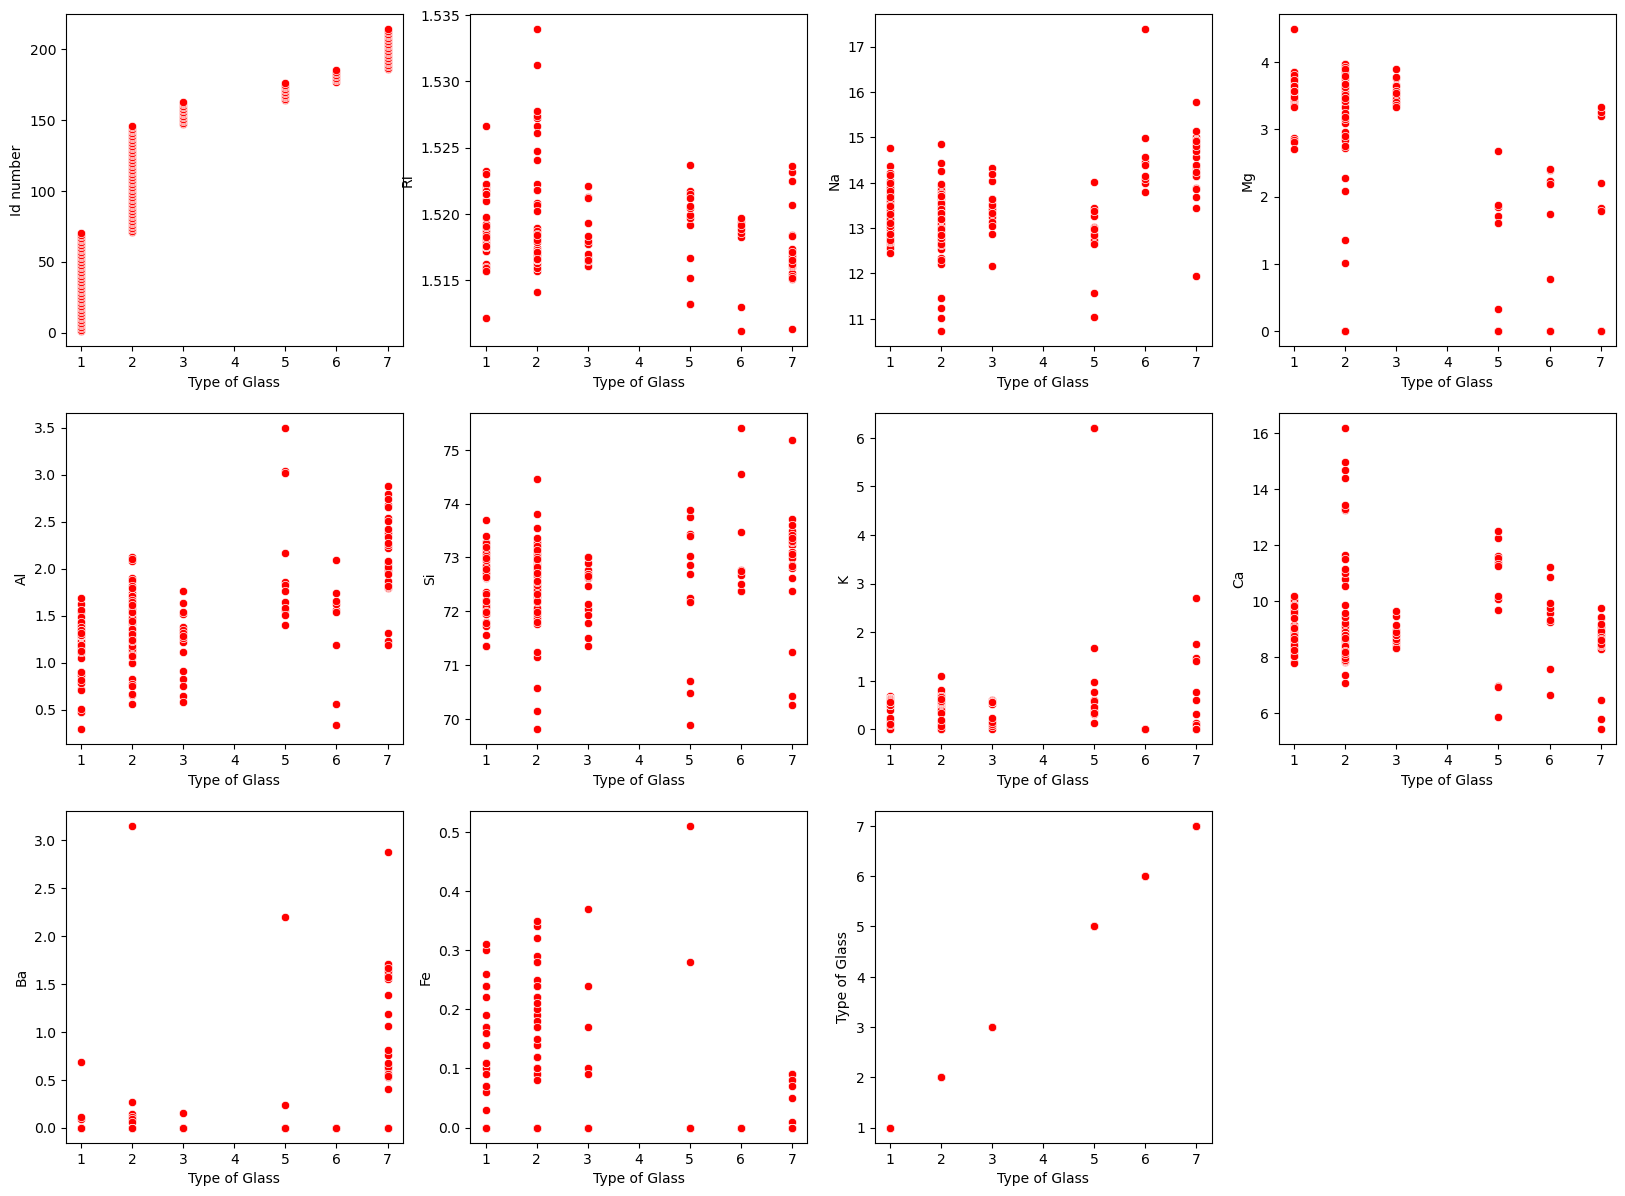

In [19]:
plt.figure(figsize = (20,25))
p = 1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.scatterplot(x="Type of Glass",y=i , data = df,color = 'r')
        plt.xlabel("Type of Glass")
        plt.ylabel(i)
    p+=1
plt.show()

# Multivariate Analysis

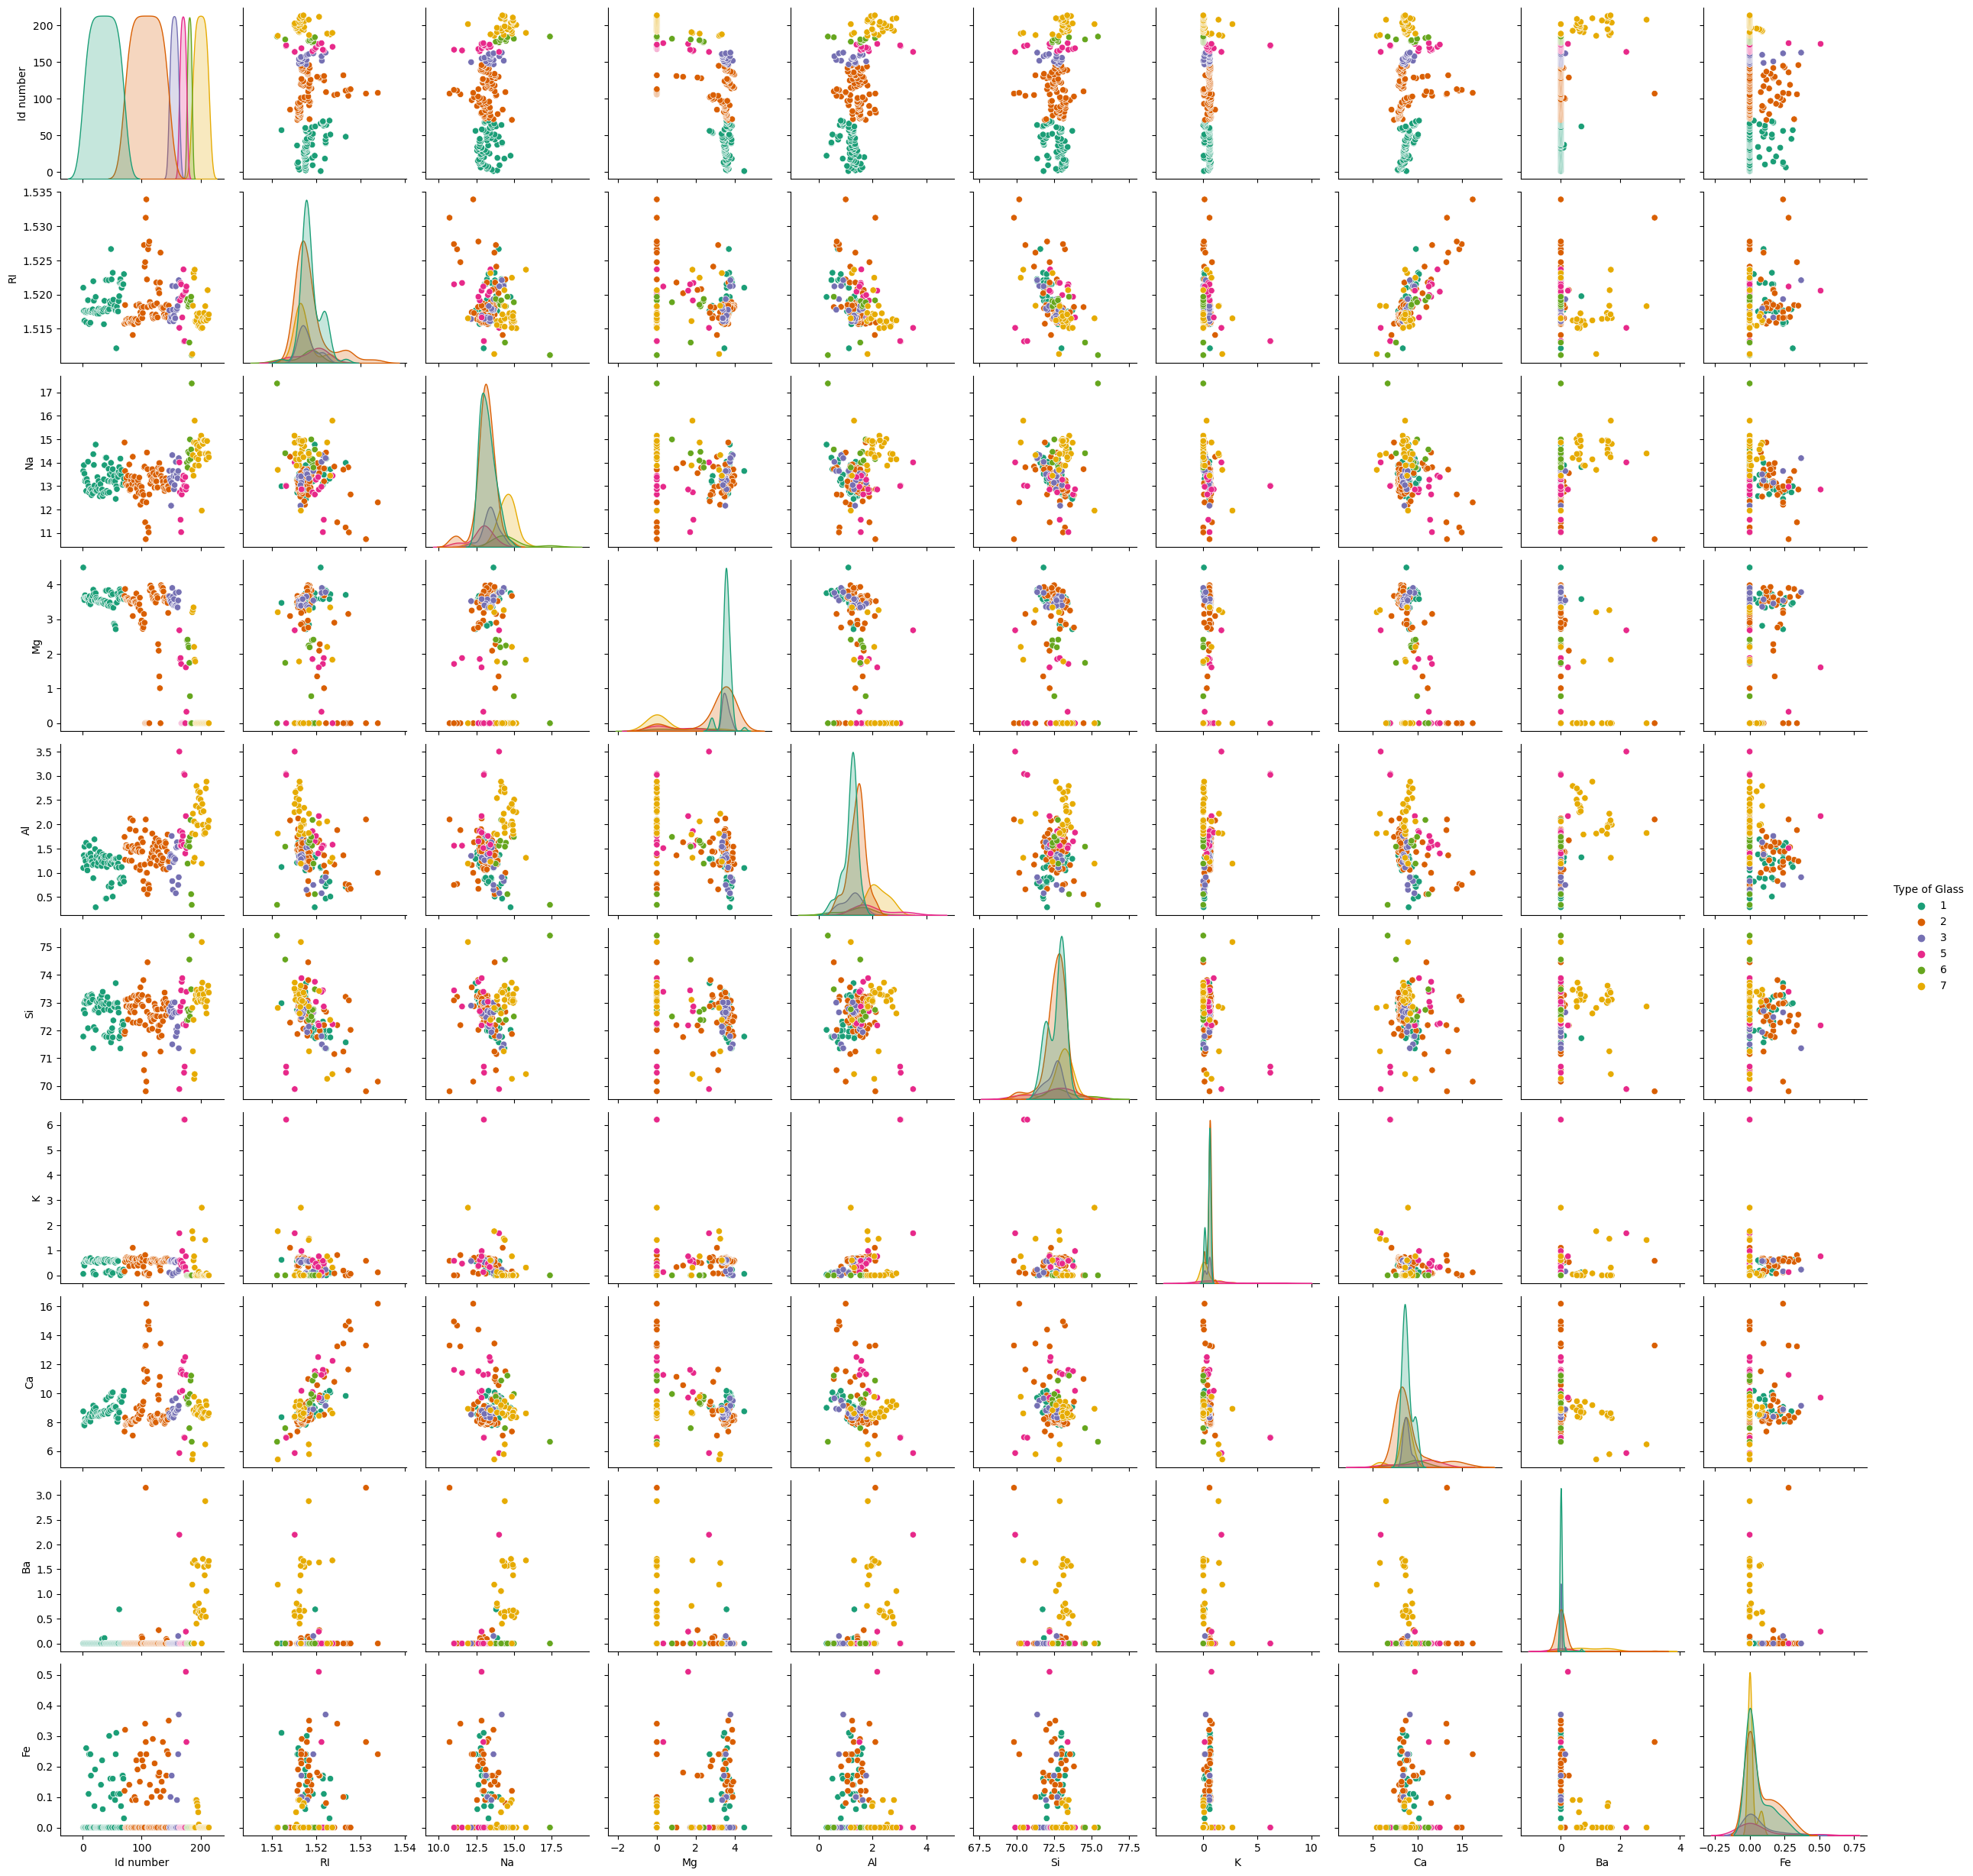

In [20]:
sns.pairplot(df,hue = "Type of Glass",palette="Dark2")
plt.show()

# Now Checking Outliers

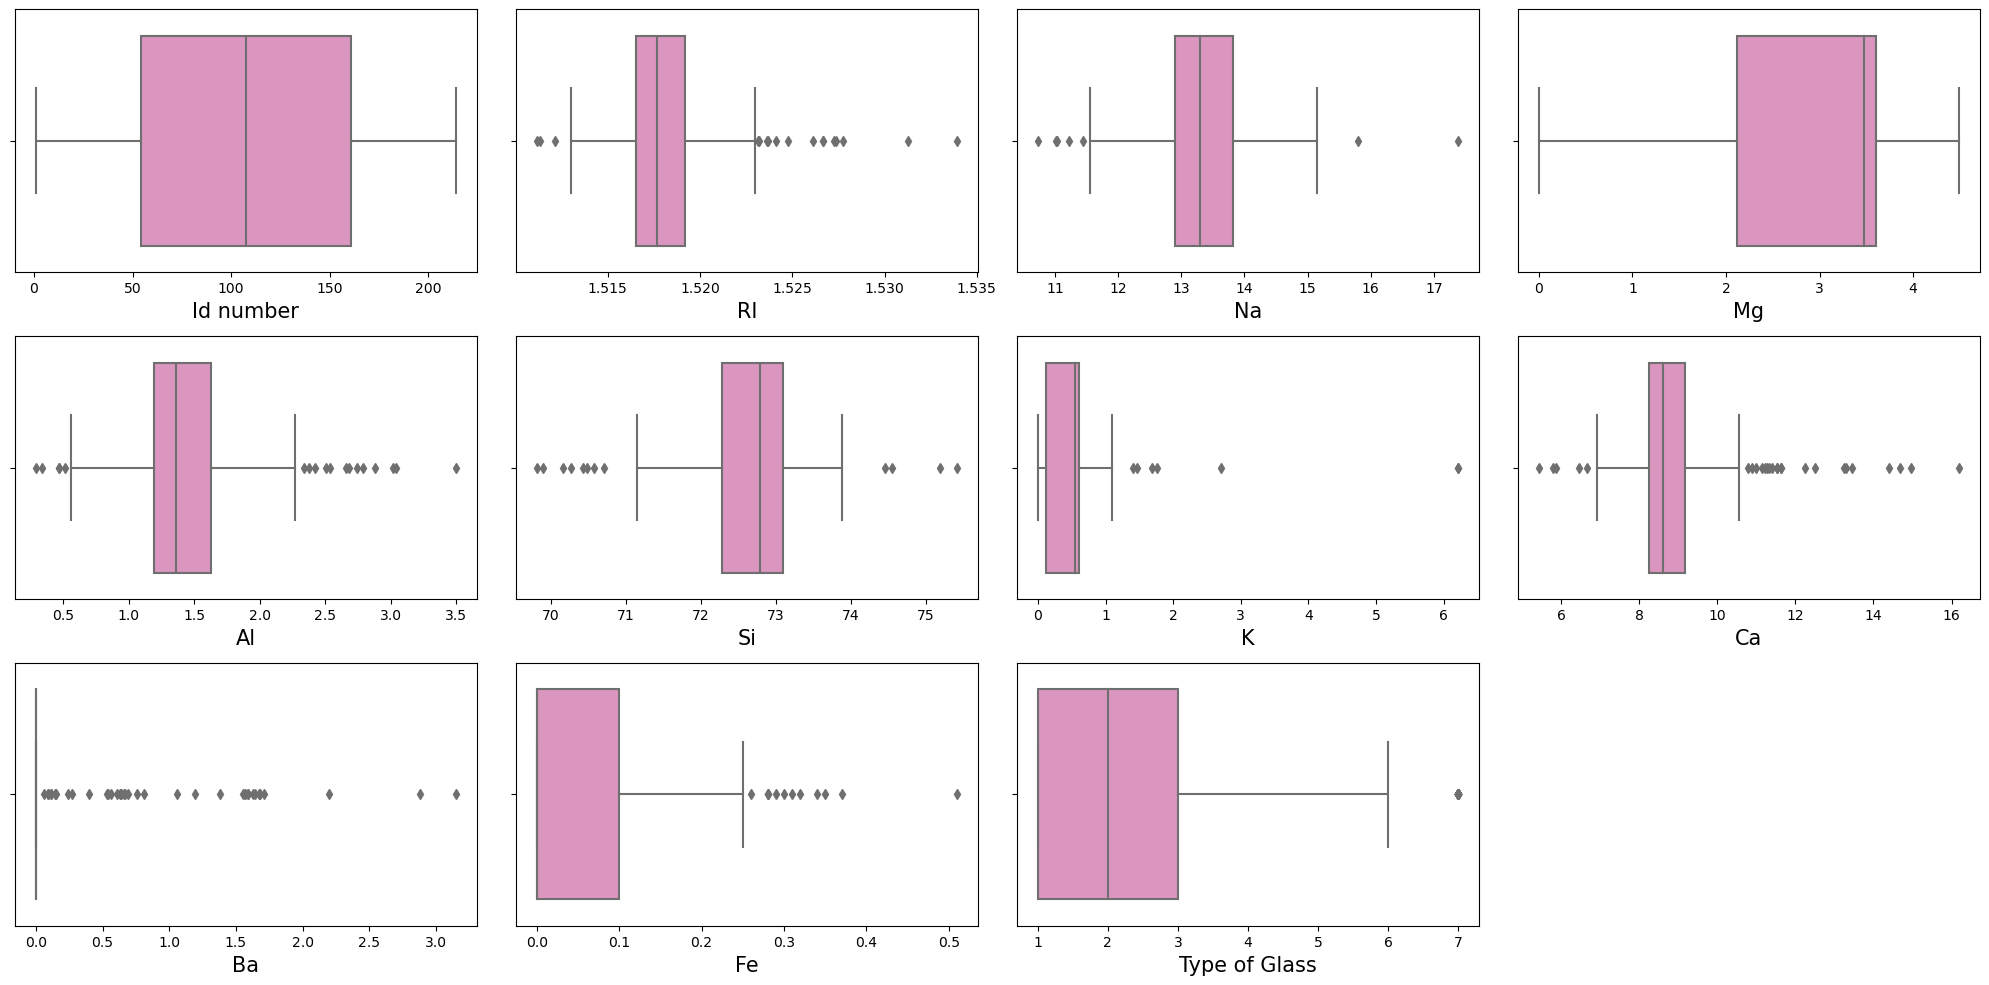

In [21]:
# Now we check the data have outliers or not
num_numerical_cols = len(numerical_col)
num_rows = 5  # Number of rows in the subplot grid
num_cols = 4  # Number of columns in the subplot grid
total_subplots = num_rows * num_cols

# Create a new figure and set its size
plt.figure(figsize=(20, 16), facecolor="white")  # Adjust the figure size as needed

# Iterate over numerical columns and create subplots for boxplots
plotnumber = 1
for col in numerical_col:
    if plotnumber <= total_subplots:
        # Create subplot at the specified position
        ax = plt.subplot(num_rows, num_cols, plotnumber)
        
        # Plot boxplot for the current column using seaborn
        sns.boxplot(x=df[col], palette="Set2_r", ax=ax)
        
        # Customize subplot labels and ticks
        plt.xlabel(col, fontsize=15)
        plt.ylabel("")  # Clear y-axis label
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(fontsize=10)
        
        plotnumber += 1  # Increment plotnumber for the next subplot

# Adjust layout to prevent overlap and improve readability
plt.tight_layout()
plt.show()  # Display the figure with subplots

Here we can see that all columns contains some outliers so we removed all outliers using IQR method

# Uisng IQR method to remove outliers

In [22]:
import pandas as pd

# Assuming df is your DataFrame containing the relevant columns

# Calculate IQR
columns_of_interest = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of Glass']
Q1 = df[columns_of_interest].quantile(0.25)
Q3 = df[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

# Remove outliers
df1 = df[~((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

# Print cleaned DataFrame
print("DataFrame after removing outliers:")
print(df1)

# Optional: Print removed outliers
print("\nOutliers removed:")
print(outliers)

DataFrame after removing outliers:
     Id number       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  \
0            1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   
1            2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   
2            3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   
3            4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   
4            5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   
..         ...      ...    ...   ...   ...    ...   ...   ...  ...  ...   
176        177  1.51905  14.00  2.39  1.56  72.37  0.00  9.57  0.0  0.0   
177        178  1.51937  13.79  2.41  1.19  72.76  0.00  9.77  0.0  0.0   
178        179  1.51829  14.46  2.24  1.62  72.38  0.00  9.26  0.0  0.0   
179        180  1.51852  14.09  2.19  1.66  72.67  0.00  9.32  0.0  0.0   
181        182  1.51888  14.99  0.78  1.74  72.50  0.00  9.95  0.0  0.0   

     Type of Glass  
0                1  
1                1  
2

When using IQR method all outliers removed

# Now cheking skewness

In [23]:
# Now cheking skewness
df1.skew()

Id number        0.142191
RI               1.052990
Na               0.843116
Mg              -3.404660
Al              -0.100644
Si              -0.476993
K               -1.022915
Ca               0.808200
Ba               0.000000
Fe               1.395243
Type of Glass    2.122805
dtype: float64

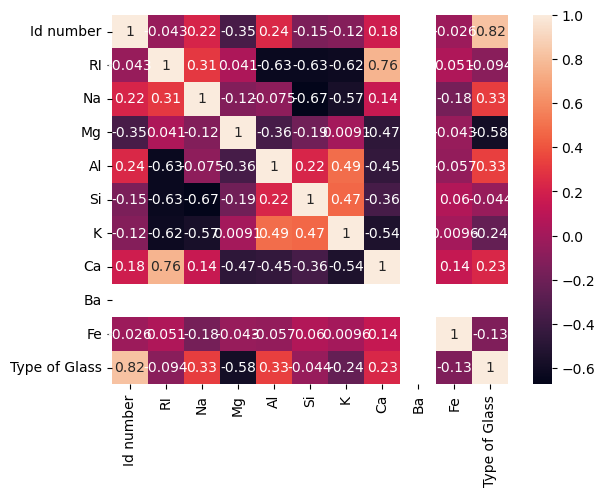

In [24]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

Here we can see that all data looks like good

In [25]:
# dropping the Id number columns because these columns contains unique values
df1.drop(["Id number"], axis=1, inplace=True)

# Split the target features

In [26]:
# Separating the independent and target varaible into x and y
x = df1.drop(['Type of Glass'], axis=1)  # Features we remove type of glass columns
y= df1["Type of Glass"].apply(lambda y_value: 1 if y_value>= 5 else 0)
print(y)   #  Here now the Type of Glass is my target variable
print("Feature Dimensions= ",x.shape)
print("Label Dimensions",y.shape)

0      0
1      0
2      0
3      0
4      0
      ..
176    1
177    1
178    1
179    1
181    1
Name: Type of Glass, Length: 136, dtype: int64
Feature Dimensions=  (136, 9)
Label Dimensions (136,)


In [27]:
y.value_counts()

0    129
1      7
Name: Type of Glass, dtype: int64

Here we can see that the data is inbalanced now try to balance the data using smote method

# SMOTE

In [28]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=1)  # or any number <= number of minority samples - 1
x1, y1 = sm.fit_resample(x, y)

Here now changing the data in x and y into x1 and y1

In [29]:
y1.value_counts()

0    129
1    129
Name: Type of Glass, dtype: int64

Now check when using smote method the data is balanced

In [30]:
x1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.521010,13.640000,4.490000,1.100000,71.780000,0.060000,8.750000,0.0,0.0
1,1.517610,13.890000,3.600000,1.360000,72.730000,0.480000,7.830000,0.0,0.0
2,1.516180,13.530000,3.550000,1.540000,72.990000,0.390000,7.780000,0.0,0.0
3,1.517660,13.210000,3.690000,1.290000,72.610000,0.570000,8.220000,0.0,0.0
4,1.517420,13.270000,3.620000,1.240000,73.080000,0.550000,8.070000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
253,1.518318,14.484720,2.171903,1.625597,72.385597,0.000000,9.292183,0.0,0.0
254,1.518622,14.758466,1.417810,1.687577,72.447577,0.000000,9.648569,0.0,0.0
255,1.519243,13.176814,2.086053,1.577580,72.719507,0.347087,9.955113,0.0,0.0
256,1.518751,14.873739,1.100267,1.713677,72.473677,0.000000,9.798641,0.0,0.0


In [31]:
y1

0      0
1      0
2      0
3      0
4      0
      ..
253    1
254    1
255    1
256    1
257    1
Name: Type of Glass, Length: 258, dtype: int64

# Find the best model

In [32]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [33]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1, 50):
    # Splitting the data into train and test sets using current random state (i)
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    
    # Initializing and training the ExtraTreesClassifier
    ETR = ExtraTreesClassifier()
    ETR.fit(x_train, y_train)
    
    # Making predictions on the test set
    pred = ETR.predict(x_test)
    
    # Calculating accuracy of the model
    acc = accuracy_score(y_test, pred)
    
    # Updating maxAccu and maxRS if current accuracy is higher
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

# Best accuracy and random state

In [34]:
print("Best accuracy is", maxAccu, "at random_state", maxRS)

Best accuracy is 1.0 at random_state 1


Here you can see that get 100% accuracy

# Creating train test split

In [35]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

# RandomForestClassifier

In [36]:
# Instantiate and train RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Make predictions on the test set
pred_rf = rf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_rf)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_rf)
print("Classification Report:")
print(report)

Accuracy: 1.0
Confusion Matrix:
[[28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



# AdaBoostClassifier

In [37]:
# Checking accuracy for AdaBoostClassifier
AB = AdaBoostClassifier()
AB.fit(x_train,y_train)
pred_ab=AB.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_ab)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_ab)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_ab)
print("Classification Report:")
print(report)

Accuracy: 1.0
Confusion Matrix:
[[28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



# BaggingClassifier

In [38]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)
pred_bc=BC.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_bc)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_bc)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_bc)
print("Classification Report:")
print(report)

Accuracy: 1.0
Confusion Matrix:
[[28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



# ExtraTreesClassifier

In [39]:
# Checking accuracy for the ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
pred_et=ET.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_et)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_et)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_et)
print("Classification Report:")
print(report)

Accuracy: 1.0
Confusion Matrix:
[[28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



# Hyper Parameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV

# Define the parameter 
parameters = {'criterion':['gini','entropy'],
              'random_state':[10,50,1000],
              'max_depth': [0,10,20],
              'n_jobs':[-2,-1,1],
              'n_estimators' : [50,100,200,300]}

In [41]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv = 5)

In [42]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [43]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 50}

In [44]:
Model = ExtraTreesClassifier ( criterion = "gini" , max_depth = 10,n_jobs = -2,random_state = 50,n_estimators = 50)
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

100.0


Here you can see that 100 % accuracy 

# Saving the model using joblib

In [45]:
# Saving the model
import joblib
joblib.dump(Model,"Glass_predict.pkl")

['Glass_predict.pkl']

In [46]:
import pickle
filename = "Glass_predict.pkl"
pickle.dump(Model, open(filename,'wb'))  #Saved model

# Predicted the saved model

In [47]:
load_model = pickle.load(open("Glass_predict.pkl",'rb'))
result = load_model.score(x_test,y_test)
print(result*100)

100.0


# Conclusion

In [48]:
conclusion = pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
Predicted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Original,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
x1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.521010,13.640000,4.490000,1.100000,71.780000,0.060000,8.750000,0.0,0.0
1,1.517610,13.890000,3.600000,1.360000,72.730000,0.480000,7.830000,0.0,0.0
2,1.516180,13.530000,3.550000,1.540000,72.990000,0.390000,7.780000,0.0,0.0
3,1.517660,13.210000,3.690000,1.290000,72.610000,0.570000,8.220000,0.0,0.0
4,1.517420,13.270000,3.620000,1.240000,73.080000,0.550000,8.070000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
253,1.518318,14.484720,2.171903,1.625597,72.385597,0.000000,9.292183,0.0,0.0
254,1.518622,14.758466,1.417810,1.687577,72.447577,0.000000,9.648569,0.0,0.0
255,1.519243,13.176814,2.086053,1.577580,72.719507,0.347087,9.955113,0.0,0.0
256,1.518751,14.873739,1.100267,1.713677,72.473677,0.000000,9.798641,0.0,0.0


# Predicted the glass type and now making the diagram

In [58]:
import numpy as np

# Define input data (Glass characteristics)
input_data = np.array([[1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.00,0.00]])  # Example input data (single sample)

# Make prediction using the trained SVR model
prediction = Model.predict(input_data)  # Use 'svr' for prediction
print("Input Data:", input_data)
print("Predicted Insurance Cost:", prediction)

Input Data: [[ 1.51829 14.46     2.24     1.62    72.38     0.       9.26     0.
   0.     ]]
Predicted Insurance Cost: [1]


In [59]:
# Assuming 'conclusion' is the predicted class label (0, 1, or 2)
if prediction == 0:
    print("Window Glass")
else:
    print("Non Window Glass")  # Handle unexpected values


Non Window Glass


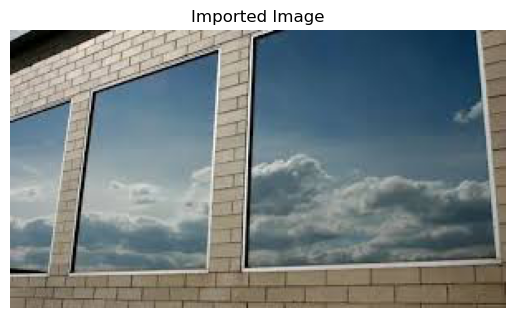

The Type of the Glass is Non Window Glass


In [60]:
from PIL import Image
import matplotlib.pyplot as plt

# Define the condition # Change this condition as per your requirement

if prediction == 1:
    # Load and display the first image
    image_path = "C:/Users/ssour/Downloads/download (10).jpeg"  # Specify the path to the first image file
elif prediction == 0:
    # Load and display the second image
    image_path = "C:/Users/ssour/Downloads/Image-2.jpg"  # Specify the path to the second image file
else:
    # Default behavior if prediction is neither 1 nor 0
    print("Invalid prediction value. No image to display.")
    image_path = None

if image_path:
    # Open and display the image using matplotlib
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title('Imported Image')
    plt.axis('off')  # Turn off axis
    plt.show()

if prediction == 0:
    print("The Type of the Glass is Window Glass")
else:
    print("The Type of the Glass is Non Window Glass")

# Thank You